# PROJET 3 : CONCEVEZ UNE APPLICATION DE SANTÉ PUBLIQUE (NETTOYAGE)

## 0 - PRÉALABLES :

### A - Gestion des avertissements :

In [1]:
# Suppression des avertissements :
import warnings
warnings.filterwarnings('ignore')

### B - Importation des librairies :

In [2]:
# Importation des librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

### C - Importation du fichier :

In [3]:
# Importation du fichier :
data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")

## I - NETTOYAGE DU FICHIER :

### A) Aperçu du fichier :

#### 1) Aperçu du tableau :

In [4]:
# Aperçu du tableau data :
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


In [5]:
# Nombre de lignes et de colonnes :
data.shape

(320772, 162)

#### 2) Aperçu des variables :

In [6]:
# Type de variables :
# data.info(verbose=True)

### B - Restriction sur les produits vendus en France :

In [7]:
# Restriction sur les produits vendus en France seulement :
data_fr = data[data["countries"].str.contains(r'(.fr|FR|Fr.)')==True]
data_fr = data_fr.drop(columns="nutrition-score-uk_100g")

### C - Traitement des valeurs manquantes et des doublons :

#### 1 - Traitement des valeurs manquantes des colonnes :

<AxesSubplot:>

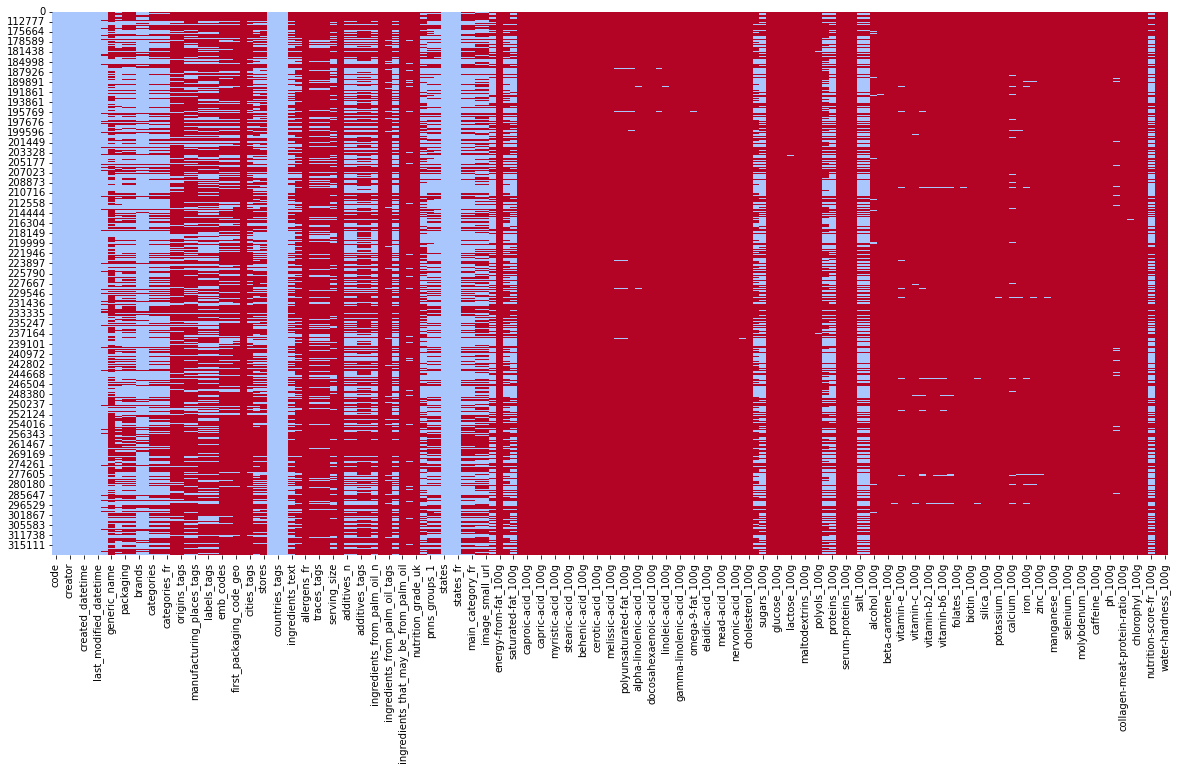

In [8]:
# Aperçu du volume d'informations manquantes sur data_fr :
plt.figure(figsize=(20,10))
sns.heatmap(data_fr.isna(),cbar=False, cmap="coolwarm", center=0.25)

In [9]:
# Définition du pourcentage de valeurs manquantes par colonne :
nan_colonnes = data_fr.isna().sum(axis=0)/data_fr.shape[0]

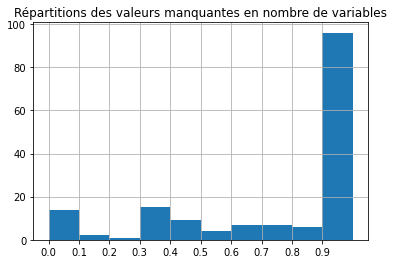

In [10]:
# Histogramme des valeurs manquantes :
plt.figure()
nan_colonnes.hist()
plt.xticks(np.arange(0, 1, step=0.1))
plt.title("Répartitions des valeurs manquantes en nombre de variables")
plt.show()

In [11]:
# Nombre de variables comptant plus de 90% de valeurs manquantes :
nan_colonnes[nan_colonnes>0.9].count()

96

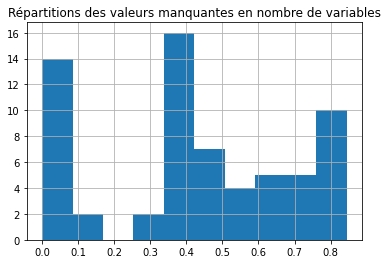

In [12]:
# Histogramme des valeurs manquantes (2) :
plt.figure()
nan_colonnes[nan_colonnes<0.9].hist()
plt.xticks(np.arange(0, 0.9, step=0.1))
plt.title("Répartitions des valeurs manquantes en nombre de variables")
plt.show()

In [13]:
# Noms des variables comportant plus de 75% et moins de 90% de valeurs manquantes
nan_colonnes[(nan_colonnes > 0.75) & (nan_colonnes < 0.9)]

origins                     0.844133
origins_tags                0.844224
emb_codes                   0.765321
emb_codes_tags              0.765321
first_packaging_code_geo    0.811795
cities_tags                 0.796917
allergens                   0.767281
traces                      0.805285
traces_tags                 0.805295
traces_fr                   0.805295
dtype: float64

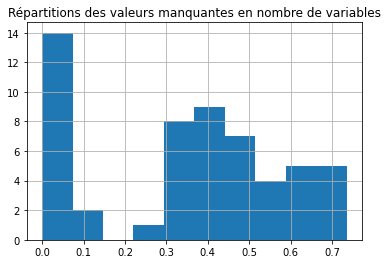

In [14]:
# Histogramme des valeurs manquantes (3) :
plt.figure()
nan_colonnes[nan_colonnes<0.75].hist()
plt.xticks(np.arange(0, 0.75, step=0.1))
plt.title("Répartitions des valeurs manquantes en nombre de variables")
plt.show()

In [15]:
# Noms des variables comportant plus de 58% et moins de 75% de valeurs manquantes
nan_colonnes[(nan_colonnes > 0.50) & (nan_colonnes < 0.75)].sort_values(ascending=False)

manufacturing_places_tags    0.734832
manufacturing_places         0.734791
serving_size                 0.732100
additives_tags               0.690520
additives_fr                 0.690520
labels                       0.643517
labels_tags                  0.643131
labels_fr                    0.643131
stores                       0.613435
generic_name                 0.610875
purchase_places              0.559424
fiber_100g                   0.535425
carbohydrates_100g           0.520211
fat_100g                     0.515823
dtype: float64

In [16]:
# Suppression des colonnes comptant plus de 54% de valeurs manquantes :
data_fr_clean = data_fr[data_fr.columns[data_fr.isna().sum()/data_fr.shape[0] < 0.54]]

#### 2) Traitement des colonnes en doublons :

##### "created_datetime" et "created_t" :

In [ ]:
# Comparaison visuelle des variables "created_datetime" et "created_t" : 
create_compare = data_fr_clean[["created_datetime","created_t"]]
create_compare.sort_values("created_datetime").head()

##### "last_modified_t" et "last_modified_datetime" :

In [ ]:
# Comparaison visuelle des variables "created_datetime" et "created_t" : 
last_compare = data_fr_clean[["last_modified_t","last_modified_datetime"]]
last_compare.sort_values("last_modified_datetime").head()

##### "packaging" et "packaging_tags" :

In [ ]:
# Comparaison visuelle des variables "packaging" et "packaging_tags" : 
packaging_compare = data_fr_clean[["packaging","packaging_tags"]]
packaging_compare.sort_values("packaging").head()

##### "brands" et "brands_tags" :

In [ ]:
# Comparaison visuelle des variables "brands" et "brands_tags" : 
brands_compare = data_fr_clean[["brands","brands_tags"]]
brands_compare.sort_values("brands").head()

##### "categories", "categories_tags" et "categories_fr" :

In [ ]:
# Comparaison visuelle des variables "categories", "categories_tags" et "categories_fr" : 
categories_compare = data_fr_clean[["categories","categories_tags","categories_fr"]]
categories_compare.sort_values("categories").head()

##### "countries", "countries_tags" et "countries_fr" :

In [ ]:
# Comparaison visuelle des variables "countries", "countries_tags" et "countries_fr" : 
countries_compare = data_fr_clean[["countries","countries_tags","countries_fr"]]
countries_compare.sort_values("countries").head()

##### "additives" et "additives_n" :

In [ ]:
# Comparaison visuelle des variables "additives" et "additives_n" : 
additives_compare = data_fr_clean[["additives", "additives_n"]]
sns.heatmap(additives_compare.isna())

##### "ingredients_from_palm_oil_n" et "ingredients_that_may_be_from_palm_oil_n" :

In [ ]:
# Comparaison visuelle des variables "ingredients_from_palm_oil_n" et "ingredients_that_may_be_from_palm_oil_n" : 
palm_compare = data_fr_clean[["ingredients_from_palm_oil_n","ingredients_that_may_be_from_palm_oil_n"]]
palm_compare.sort_values("ingredients_from_palm_oil_n").head()

##### "pnns_groups_1" et "pnns_groups_2" :

In [ ]:
# Comparaison visuelle des variables "pnns_groups_1" et "pnns_groups_2" : 
pnns_compare = data_fr_clean[["pnns_groups_1","pnns_groups_2"]]
pnns_compare.sort_values("pnns_groups_1").head()

##### "states", "states_tags" et "states_fr" :

In [ ]:
# Comparaison visuelle des variables "states", "states_tags" et "states_fr" : 
states_compare = data_fr_clean[["states","states_tags","states_fr"]]
states_compare.sort_values("states").head()

##### "main_category" et "main_category_fr" :

In [ ]:
# Comparaison visuelle des variables "main_category" et "main_category_fr" : 
main_cat_compare = data_fr_clean[["main_category","main_category_fr","categories"]]
main_cat_compare.sort_values("main_category").head()

In [ ]:
# Suppression des tableaux de comparaison :
del(create_compare,last_compare,packaging_compare,brands_compare,categories_compare,countries_compare,additives_compare,palm_compare,pnns_compare,states_compare,main_cat_compare)

In [ ]:
# Suppression des colonnes qui doublonnent avec d'autres :
data_fr_clean.drop(columns="packaging_tags", inplace=True)
data_fr_clean.drop(columns="brands_tags", inplace=True)
data_fr_clean.drop(columns="created_datetime", inplace=True)
data_fr_clean.drop(columns="last_modified_t", inplace=True)
data_fr_clean.drop(columns="categories_tags", inplace=True)
data_fr_clean.drop(columns="categories_fr", inplace=True)
data_fr_clean.drop(columns="countries", inplace=True)
data_fr_clean.drop(columns="countries_tags", inplace=True)
data_fr_clean.drop(columns="additives_n", inplace=True)
data_fr_clean.drop(columns="states", inplace=True)
data_fr_clean.drop(columns="states_tags", inplace=True)
data_fr_clean.drop(columns="main_category", inplace=True)

#### 2 - Traitement valeurs manquantes des lignes :

In [ ]:
# Aperçu du volume d'informations manquantes sans les colonnes qui en comportent plus de 54% :
plt.figure(figsize=(20,10))
sns.heatmap(data_fr_clean.isna(),cbar=False, cmap="coolwarm", center=0.25)

In [ ]:
# Définition du pourcentage de valeurs manquantes par ligne :
nan_raws = data_fr_clean.isna().sum(axis=1)/data_fr_clean.shape[1]

In [ ]:
# Histogramme des valeurs manquantes :
plt.figure()
nan_raws.hist()
plt.title("Répartitions des valeurs manquantes en nombre de lignes (produits)")
plt.show()

In [ ]:
# Nombre de produit comportant plus de 69% de valeurs manquantes :
nan_raws[nan_raws > 0.69].count()

In [ ]:
# Nombre de produit comportant plus de 68% de valeurs manquantes :
nan_raws[nan_raws > 0.68].count()

In [ ]:
# Nombre de produit comportant plus de 44% de valeurs manquantes :
nan_raws[nan_raws > 0.44].count()

In [ ]:
# Nombre de produit comportant plus de 43% de valeurs manquantes :
nan_raws[nan_raws > 0.43].count()

In [ ]:
# Quelles variables sont concernées pour les produits contenant beaucoup de manques (à 0,44) :
plt.figure(figsize=(20,10))
sns.heatmap(data_fr_clean[data_fr_clean.isna().sum(axis=1)/data_fr_clean.shape[1]>0.44].isna(),cbar=False, cmap="coolwarm", center=0.25)

In [ ]:
# Quelles variables sont concernées pour les produits contenant beaucoup de manques (à 0,44) :
data_fr_clean[data_fr_clean.isna().sum(axis=1)/data_fr_clean.shape[1]>0.44].isnull().sum()

In [ ]:
# Suppression des lignes comptant plus de 44% de valeurs manquantes :
data_fr_clean = data_fr_clean[data_fr_clean.isna().sum(axis=1)/data_fr_clean.shape[1] < 0.44]

#### 3) Traitement des doublons :

In [ ]:
# Affichage des doublons :
data_fr_clean.loc[data_fr_clean["code"].duplicated(keep=False)]

In [ ]:
# Suppression des doublons avec conservation de la version la mieux renseignée :
data_fr_clean["nb_nan"] = data_fr_clean.isna().sum(axis=1)
data_fr_clean = data_fr_clean.sort_values("nb_nan")
data_fr_clean = data_fr_clean.drop_duplicates("code", keep="first")
data_fr_clean = data_fr_clean.drop("nb_nan", axis=1)
data_fr_clean = data_fr_clean.sort_index()

In [ ]:
# Aperçu du volume d'informations manquantes après le nettoyage des colonnes et des doublons :
plt.figure(figsize=(20,10))
sns.heatmap(data_fr_clean.isna(),cbar=False, cmap="coolwarm", center=0.25)

#### 4) Suppression des anomalies repérées durant l'exploration :

In [ ]:
# Anomalies à supprimer (dvd Harry Potter, cordes de guitare, lingettes, eau aux propriétés suspectes...)
to_drop = ("7340055304214","5051889553625","698502500571","6091035082004","1489940184","883929140886","3286011051744")

In [ ]:
# Suppression des anomalies repérées :
data_fr_clean = data_fr_clean[~data_fr_clean["code"].isin(to_drop)]

### D - Traitement des variables :

####  1) "code" :

In [ ]:
# Nombre de chiffres constituant le code barre :
data_fr_clean["nb_chiffres_code_barres"] = data_fr_clean["code"].astype(str)
data_fr_clean["nb_chiffres_code_barres"] = data_fr_clean["nb_chiffres_code_barres"].str.len()
data_fr_clean.groupby("nb_chiffres_code_barres").count()

In [ ]:
# Suppression des produits dont le code barre est erroné : :
EAN = (8,13)
data_fr_clean = data_fr_clean[(data_fr_clean["nb_chiffres_code_barres"]==8) | (data_fr_clean["nb_chiffres_code_barres"]== 13)]
data_fr_clean = data_fr_clean.drop(columns="nb_chiffres_code_barres")

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"code":"code_barres"}, inplace=True)

#### 2) "url" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"url":"url_produit"}, inplace=True)

#### 3) "creator" :

In [ ]:
# Suppression de la colonne "creator" :
data_fr_clean = data_fr_clean.drop(columns="creator")

#### 3) "created_t" :

Cette variable correspond à la date d'entrée du produit dans le jeu de données. Il est en format UNIX timestamp et de type objet. Il faut donc le transformer et le typer en date.

In [ ]:
# Typage de "created_t" :
data_fr_clean["created_t"] = data_fr_clean["created_t"].astype(float)
data_fr_clean["created_t"] = [datetime.fromtimestamp(x) for x in data_fr_clean["created_t"]]

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"created_t":"date_enregistrement"}, inplace=True)

#### 4) "last_modified_datetime" :

Même cas que précédemment. Pour varier la procédure, c'est cette fois la variable last_modified_datetime, qui est une variable date mal formatée qui va être transformée et conservée.

In [ ]:
# Conversion des colonnes de data à un format de date :
data_fr_clean["last_modified_datetime"]= pd.to_datetime(data_fr_clean["last_modified_datetime"]).dt.tz_localize(None)

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"last_modified_datetime":"date_derniere_modification"}, inplace=True)

#### 5) "product_name" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"product_name":"nom_produit"}, inplace=True)

#### 6) "quantity" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"quantity":"quantite"}, inplace=True)

#### 7) "packaging" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"packaging":"emballage"}, inplace=True)

#### 8) "brands" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"brands":"marque"}, inplace=True)

#### 9) "categories" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"categories":"categorie_produits"}, inplace=True)

#### 10) "countries_fr" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"countries_fr":"dispo_pays"}, inplace=True)

#### 11) "ingredients" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"ingredients":"ingredients"}, inplace=True)

#### 12) "additives"

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"additives":"additifs"}, inplace=True)

#### 13) "ingredients_from_palm_oil_n" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"ingredients_from_palm_oil_n":"ingredients_huile_palme"}, inplace=True)

#### 14) "ingredients_that_may_be_from_palm_oil_n" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"ingredients_that_may_be_from_palm_oil_n":"ingredients_huile_palme_possible"}, inplace=True)

#### 15) nutrition_grade_fr :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"nutrition_grade_fr":"nutriscore"}, inplace=True)

#### 16) "pnns_groups_1" :

In [ ]:
# Remplacement de "unknown" par "NaN" :
data_fr_clean["pnns_groups_1"] = data_fr_clean["pnns_groups_1"].replace("unknown", np.NaN)

In [ ]:
# Traitement des erreurs de formatage :
data_fr_clean["pnns_groups_1"].replace(["fruits-and-vegetables","sugary-snacks","cereals-and-potatoes"],["Fruits and vegetables","Sugary snacks","Cereals and potatoes"],inplace=True)

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"pnns_groups_1":"groupes_produits_1"}, inplace=True)

#### 17) "pnns_groups_2" :

In [ ]:
# Remplacement de "unknown" par "NaN" :
data_fr_clean["pnns_groups_2"] = data_fr_clean["pnns_groups_2"].replace("unknown", np.NaN)

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"pnns_groups_2":"groupes_produits_2"}, inplace=True)

#### 18) "states_fr" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"states_fr":"etat_du_renseignement"}, inplace=True)

#### 19) "main_category_fr" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"main_category_fr":"type_produits"}, inplace=True)

#### 20) "image_url" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"image_url":"url_image"}, inplace=True)

#### 21) "image_small_url" :

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"image_small_url":"url_image_miniature"}, inplace=True)

#### 22) "energy_100g" :

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["energy_100g"])
plt.xscale("log")
plt.show

In [ ]:
# Calcul du score Z :
z = np.abs(stats.zscore(data_fr_clean["energy_100g"], nan_policy="omit"))

In [ ]:
# Suppression des valeurs aberrantes :
data_fr_clean["energy_100g"] = data_fr_clean["energy_100g"][z < 3]
del(z)

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"energy_100g":"energie_100g"}, inplace=True)

#### 23) "fat_100g" :

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["fat_100g"])
plt.show

In [ ]:
# Identification et suppression des valeurs aberrantes :
data_fr_clean.sort_values(by="fat_100g",ascending=False)
data_fr_clean["fat_100g"] = data_fr_clean["fat_100g"][data_fr_clean["fat_100g"]<=100]

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"fat_100g":"graisse_100g"}, inplace=True)

#### 24) "saturated-fat_100g"

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["saturated-fat_100g"])
plt.show

In [ ]:
# Identification et suppression des valeurs aberrantes :
data_fr_clean.sort_values(by="saturated-fat_100g",ascending=False)
data_fr_clean["saturated-fat_100g"] = data_fr_clean["saturated-fat_100g"][data_fr_clean["saturated-fat_100g"]<=100]

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"saturated-fat_100g":"graisse_saturee_100g"}, inplace=True)

#### 25) "carbohydrates_100g" :

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["carbohydrates_100g"])
plt.show

In [ ]:
# Identification et suppression des valeurs aberrantes :
data_fr_clean.sort_values(by="carbohydrates_100g",ascending=False)
data_fr_clean["carbohydrates_100g"] = data_fr_clean["carbohydrates_100g"][data_fr_clean["carbohydrates_100g"]<=100]

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"carbohydrates_100g":"glucides_100g"}, inplace=True)

#### 26) "sugars_100g" :

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["sugars_100g"])
plt.show

In [ ]:
# Identification et suppression des valeurs aberrantes :
data_fr_clean.sort_values(by="sugars_100g",ascending=False)
data_fr_clean["sugars_100g"] = data_fr_clean["sugars_100g"][data_fr_clean["sugars_100g"]<=100]

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"sugars_100g":"sucres_100g"}, inplace=True)

#### 27) "fiber_100g" :

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["fiber_100g"])
plt.show

In [ ]:
# Identification et suppression des valeurs aberrantes :
data_fr_clean.sort_values(by="fiber_100g",ascending=False)
data_fr_clean["fiber_100g"] = data_fr_clean["fiber_100g"][data_fr_clean["fiber_100g"]<=100]

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"fiber_100g":"fibres_100g"}, inplace=True)

#### 28) "proteins_100g" :

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["proteins_100g"])
plt.show

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"proteins_100g":"proteines_100g"}, inplace=True)

#### 29) "salt_100g" :

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["salt_100g"])
plt.show

In [ ]:
# Identification et suppression des valeurs aberrantes :
data_fr_clean.sort_values(by="salt_100g",ascending=False)
data_fr_clean["salt_100g"] = data_fr_clean["salt_100g"][data_fr_clean["salt_100g"]<125]
data_fr_clean["salt_100g"] = data_fr_clean["salt_100g"].replace(125,100)

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"salt_100g":"sel_100g"}, inplace=True)

#### 30) "sodium_100g"

In [ ]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(data_fr_clean["sodium_100g"])
plt.show

In [ ]:
# Identification et suppression des valeurs aberrantes :
data_fr_clean.sort_values(by="sodium_100g",ascending=False)
data_fr_clean["sodium_100g"] = data_fr_clean["sodium_100g"][data_fr_clean["sodium_100g"]<=50]

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"sodium_100g":"sodium_100g"}, inplace=True)

#### 31) "nutrition-score-fr_100g"

In [ ]:
# Suppression des valeurs négatives :
data_fr_clean["nutrition-score-fr_100g"] = np.abs(data_fr_clean["nutrition-score-fr_100g"])

In [ ]:
# Changement du nom de la variable :
data_fr_clean.rename(columns={"nutrition-score-fr_100g":"indice_nutrition_uk_100g"}, inplace=True)

### F - Aperçu final et export :

#### 1) Aperçu final :

In [ ]:
# Aperçu du volume d'informations manquantes sur le jeu de données final :
plt.figure(figsize=(20,10))
sns.heatmap(data_fr_clean.isna(),cbar=False, cmap="coolwarm", center=0.25)

In [ ]:
# Pourcentage de valeurs manquantes :
data_fr_clean.isna().sum().sum()/data_fr_clean.count().sum()

In [ ]:
# Aperçu du tableau :
data_fr_clean.head()

In [ ]:
# Liste des variables :
data_fr_clean.columns

In [ ]:
# Informations tableau :
data_fr_clean.describe()

#### 2) Export :

In [ ]:
# Export :
data_fr_clean.to_csv("data_fr_clean.csv", index = False)